
<div style="text-align: left"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBPtuRucr_9WOZ-DOIie_vrhYHmihX_mvQOw&usqp=CAU" width="600" /></div>

**Docentes:** Verónica Barraza y Diego Frigerio 
![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png) 



# Introducción a la Regresión

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png) 


Muchos problemas en Data Science implican explorar las relaciones entre dos o más variables. La regresión es un problema fundamental en el aprendizaje automático y los problemas de regresión aparecen en una amplia gama de áreas de investigación y aplicaciones:

- análisis de series de tiempo (por ejemplo, identificación del sistema)
- control y robótica (p. ej., aprendizaje de refuerzo, aprendizaje de modelo directo/inverso)
- optimización (por ejemplo, búsquedas de línea, optimización global)
- aplicaciones de aprendizaje profundo (por ejemplo, juegos de computadora, traducción de voz a texto, reconocimiento de imágenes, anotación automática de video).

> **Definición**: Supongamos que hemos recolectado datos bivariados $(x_i, y_i), i = 1, . . . , n$. El objetivo de la regresión lineal
 es modelar la relación entre $X$ y $Y$ encontrando una función $y = f(x)$ que es una
ajuste cercano a los datos.
>
>Una variable, denominada $X$, se considera como la **variable predictiva, explicativa o independiente**.
>
>La otra variable, denominada $Y$ , se considera **la respuesta, el resultado o la variable dependiente**.

Ejemplo

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

x = np.random.randint(0, 50, 1000)
y = x + np.random.normal(0, 10, 1000)

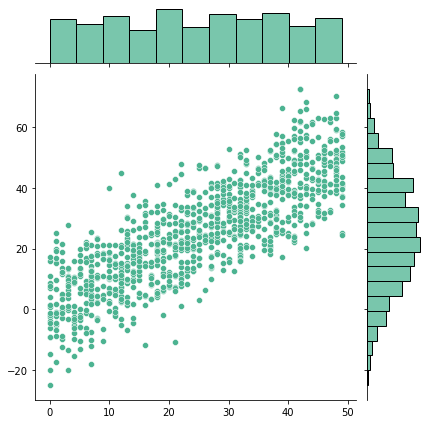

In [6]:
sns.jointplot(x=x, y=y, kind="scatter", color="#4CB391")

La figura anterior presenta **un diagrama de dispersión** de los datos. La inspección de esta dispersión indica que, aunque ninguna curva simple pasará exactamente a través de todos los puntos, hay una **fuerte** indicación de que los puntos se encuentran dispersos al azar alrededor de una línea recta. Asi que:

> $E(Y/x)=\mu_{(Y/x)} = \beta_{0}+\beta_{1}x$

donde la pendiente y la intersección de la recta se denominan **coeficientes de regresión**.

Tenga en cuenta que ninguno de los puntos de datos se encuentra realmente en la línea. Más bien, esta línea tiene el "mejor ajuste" con respecto a todos los datos, con un pequeño error para cada punto de datos.

> $\hat{Y}=\beta_{0}+\beta_{1} x + \epsilon$

donde $\epsilon$ es el término de error aleatorio.

> Llamaremos a este modelo **modelo de regresión lineal simple**.

#Método de Cuadrados Mínimos

Bienvenido/da a la ejercitación del método de Cuadrados Mínimos. En esta oportunidad pondrás en práctica lo aprendido. Utilizarás un enfoque de aproximación iterativo y analítico, como ya es costumbre en este bloque. Poner en práctica la matemática detrás de estos modelos te permitirá tomar mejores decisiones a la hora de implementar y diseñar modelos de machine learning. Puede parecer aburrido pero te dará una buena base de conocimientos.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
np.random.seed(1)
x = np.random.normal(0, 50, 10)
y = x+0.5 + np.random.normal(0, 10, 10)

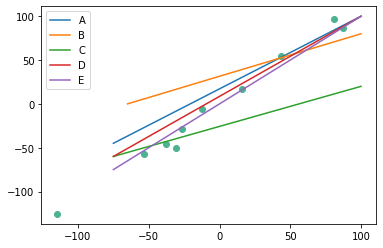

In [9]:
plt.scatter(x=x, y=y, color="#4CB391")
plt.plot([-75,100],[-45,100],label='A')
plt.plot([-65,100],[0,80],label='B')
plt.plot([-75,100],[-60,20],label='C')
plt.plot([-75,100],[-60,100],label='D')
plt.plot([-75,100],[-75,100],label='E')
plt.legend()

##Funciones Lineales

La regresión lineal es una de las formas más simples de machine learning.

En estas funciones hay una variable dependiente y una o más variables independientes. Por ahora avancemos con regresiones lineales de 1 variable. Ya sabemos que estas tiene la forma Y = mX + C, donde: "X" es la variable independiente, "Y" la variable dependiente y "m" y "c" los parámetros que ajusta el modelo.

> El método de cuadrados mínimos consiste en disminuir el error cuadrático. 

> Este es la suma de los errores de cada punto al cuadrado. 

Esta ecuación va a ser la función de costo de tu modelo:


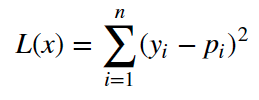

Empezaremos generando una muestra de datos que posteriormente vamos a ajustar:

In [10]:
# Generamos data a partir de una función lineal
n = 200
X = np.linspace(-4,10,n)
y = 3*X + 25 + 5* np.random.randn(n)#m=3 y c=25

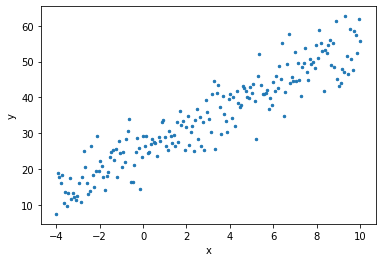

In [11]:
#ploteamos los datos
plt.scatter(X, y, s=6)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Ahora debemos minimizar la función de costo y encontrar los valores de m y c. ¿Recordás cómo minimizamos una función? ¡Derivando e igualando a 0!. 

Despues de despejar valores, nos quedamos con las siguientes ecuaciones:

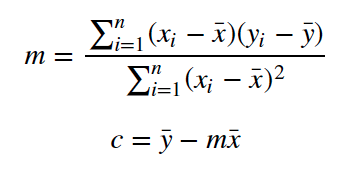

Ahora sólo nos queda iterar cada función con cada punto de nuestra muestra para encontrar los parámetros de la recta. Esta recta nos permitirá hacer las predicciones y conocer la naturaleza de los datos.

In [12]:
#Construimos el modelo
X_mean = np.mean(X)
Y_mean = np.mean(y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(y[i] - Y_mean)
    den += (X[i] - X_mean)**2
    
m_predict = num / den
c_predict = Y_mean - m_predict*X_mean

print (m_predict, c_predict)

3.021665915487772 25.466165217858734


Para pensar: ¿son iguales los resultados obtenidos a los parámetros que definimos en la función que generó los datos? ¿por qué?

Grafiquemos la regresión:

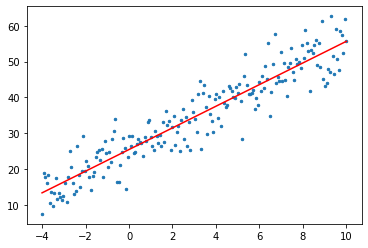

In [13]:
#la función predictora
Y_pred = m_predict*X + c_predict

plt.scatter(X, y, s=6) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') #regresión

plt.show()

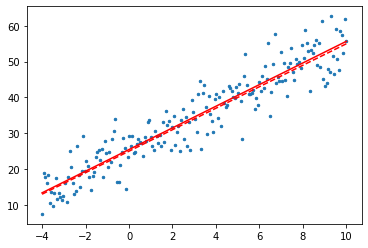

In [14]:
#incluimos la curva teórica
Y_pred = m_predict*X + c_predict
y_teorica = 3*X + 25

plt.plot(X, y_teorica, '--',label ='Curva Teórica', c = 'r')
plt.scatter(X, y, s=6) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') #regresión

plt.show()

*¡Casi* iguales!

### **¿Cómo podemos medir el rendimiento de nuestro modelo?**

Supongamos por un momento que cada punto $y_i$ estuviera muy cerca de la media $\bar{y}$: esto significaría que cada $y_i$ no dependería de $x_i$, y que no habría mucho error aleatorio en el valor tampoco. Sin embargo, esperamos que esto no debería
sea ​​el caso.

Veamos qué tan lejos está $y_i$ de la media $\bar{y}$. Escribiremos esta diferencia como:

> <span style="font-family:Papyrus; font-size:2em;">$y_i-\bar{y} = (\hat{y_i}- \bar{y}) - (y_i -\hat{y_i })$<intervalo>
>
> $y_i-\bar{y}$ = **diferencia explicada por modelo - diferencia no explicada por modelo**

In [15]:
np.random.seed(123)
#
N = 100
beta_0 = 1.5
beta_1 = 0.5
#
X = np.linspace(start = 0, stop = 20, num = N)
e = np.random.normal(loc = 0, scale = 2, size = N)
Y = beta_0 + beta_1 * X + e

In [16]:
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

0.5028067660012472 1.5261504869682474


In [17]:
#plotting values 
x_max = np.max(X) 
x_min = np.min(X)
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

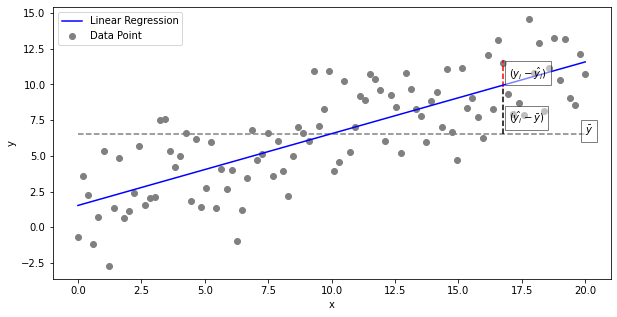

In [18]:
plt.figure(figsize = (10,5))
plt.plot([16.75, 16.75, 16.75], [6.55,9.79, 9.79], color='k', linestyle='--')   
plt.plot([16.75, 16.75, 16.75], [9.79,11.7, 11.7], color='r', linestyle='--')  
plt.plot(x, y, color='blue', label='Linear Regression')
plt.hlines(y_mean,x_min, x_max,  color='grey',linestyle='--')
plt.text(20,y_mean, 
  r'$\bar{y}$', fontsize = 10,bbox=dict(facecolor='white', alpha=0.5))
plt.text(17,y_mean+0.8, 
  r'$(\hat{y_i}- \bar{y})$', fontsize = 10,bbox=dict(facecolor='white', alpha=0.5))
plt.text(17,10.5, 
  r'$(y_i -\hat{y_i})$', fontsize = 10,bbox=dict(facecolor='white', alpha=0.5))
plt.scatter(X, Y, color='grey', label='Data Point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**El residuo** se define como $(y_i -\hat{y_i})$: la distancia desde el punto de datos original hasta el valor predicho en la línea.

> Si nuestro modelo está haciendo un buen trabajo, entonces debería explicar la mayor parte de la diferencia con $\bar{y}$.

> Si el término $(y_i -\hat{y_i})$ es mucho más grande que ($\hat{y_i}- \bar{y}$), entonces el modelo probablemente no sea tan útil.

Ahora, elevamos al cuadrado la cantidad de la izquierda, trabajamos con algo de álgebra y usamos algunos hechos sobre la regresión lineal, encontraremos que:

> <span style="font-family:Papyrus; font-size:2em;">$\sum_{i}(y_i-\bar{y})^2 = \sum_{i}(\hat{y_i}- \bar{y})^2 + \sum_{i}(y_i -\hat{y_i})^2 $
>
> $SS_{total}$ = $SS_{modelo}$ + $SS_{error}$</span>

Donde SS es suma de cuadrados.

In [19]:
SS_total=np.sum((Y-y_mean)**2)

In [20]:
y_est = b0 + b1 * X
SS_model=np.sum((y_est-y_mean)**2)
SS_error=np.sum((Y-y_est)**2)

In [21]:
print('SST_total:',round(SS_total,2),'SS_model:', round(SS_model,2), 'SS_error:',(round(SS_error,2)))

SST_total: 1368.88 SS_model: 859.74 SS_error: 509.14


La fracción de la variación que se explica determina la bondad de la regresión y se denomina `coeficiente de
determinación`, $r^2$:

> <span style="font-family:Papyrus; font-size:2em;">$r^2 =\frac{SS_{modelo}}{SS_{total}}=\frac{SS_{total}- SS_{ Error}}{SS_{total}} $</span>

In [22]:
r_2=SS_model/SS_total
print('r2',round(r_2,2))

r2 0.63


- Como $r^2$ es una proporción, siempre es un número entre 0 y 1.
- Si $r^2$ = 1, todos los puntos de datos caen perfectamente en la línea de regresión. ¡El predictor x representa toda la variación en y!
- Si $r^2$ = 0, la línea de regresión estimada es perfectamente horizontal. ¡El predictor x no explica ninguna de las variaciones en y!
- $r^2$ entre 0 y 1 ×100 representan: el porcentaje de la variación en y se 'explica' por la variación en el predictor x".

> RECUERDA: **Asociación no es causalidad**. Es decir, el hecho de que un conjunto de datos se caracterice por tener un valor alto de r cuadrado no implica que x provoque los cambios en y.
---

### Veamos como lo resolvemos con sklearn

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generamos datos ficticios
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# Entrenamos el modelo
model = LinearRegression()# se genera el objeto
model.fit(x, y) # entrena el modelo

# Hacemos una predicción
y_pred = model.predict([[65]])

print("La predicción para x=65 es:", y_pred[0])

La predicción para x=65 es: 40.733333333333334


In [27]:
# Información del modelo
# ==============================================================================
print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_.flatten())

Intercept: 5.633333333333329
Coeficiente: [0.54]


In [32]:
# Make predictions using the testing set
y_pred = model.predict(X = x.reshape(-1, 1))

In [35]:
from sklearn.metrics import r2_score

r2_training=r2_score(y, y_pred)
r2_training

0.7158756137479542

In [36]:
x_test = np.array([15, 15, 20, 35, 45, 65]).reshape((-1, 1))
y_test = np.array([5, 20, 12, 32, 21, 32])

In [37]:
y_pred_test = model.predict(X = x_test.reshape(-1, 1))

In [39]:
r2_test=r2_score(y_test, y_pred_test)
r2_test

0.3989203233256353

## Ejercicios:

1)

  a - Genera datos aleatorios para x y y, y ajusta un modelo de regresión lineal simple a ellos.

  b - Estimar la pendiente y ordenada al origen de estas variables. Gráficar la recta de regresión y los valores. Cálcular el coeficiente de determinación
    
  
```
  x = np.array([55.0, 38, 68, 70, 53, 46, 11, 16, 20, 4])
  y = np.array([153.0, 98, 214, 220, 167, 145, 41, 63, 65, 25])

```


2- Levantar el dataset de pinguinos. Luego calcular el coeficiente de correlación entre todas sus variables. Estimar la masa corporal con la variable que presenta mayor poder explicativo.

3- Estimar las ventas en función del costo de los anuncios publicitarios en tv.

In [ ]:

# Datos
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]


ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv,  'ventas': ventas})


4- Se ajusta un modelo empleando como variable respuesta runs y como predictor bateos. 

  1. Hacer un gráfico para mostrar la relación entre las dos variables.

  2. Cálcular mediante un modelo de regresión simple la relación entre los bateos y runs usando la ecuación y comparar contra la salida de una de las librerías.

  3. Hacer un gráfico para mostrar la recta de regresión.

  4. Calculae el $R^2$



In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

#Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Generamos data a partir de una función lineal
n = 200
X = np.linspace(-4,10,n)
y = 3*X + 25 + 5* np.random.randn(n)

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y ,exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     915.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.44e-76
Time:                        22:18:48   Log-Likelihood:                -627.00
No. Observations:                 200   AIC:                             1258.
Df Residuals:                     198   BIC:                             1265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9210      0.491     50.709      0.0

5- Repetir el ejercicio 1 y 4 con statsmodels

#Cuadrados mínimos no lineales

Hasta ahora vimos cómo hacer regresiones lineales. Ahora vamos a aplicar el método de cuadrados mínimos a una función no lineal. Este método nos permite encontrar los parámetros que mejor ajustan a una función cualquiera, con una serie de datos minimizando la suma del cuadrado del error, o erro cuadrático.

 Para entender cómo funciona, vamos a generar datos dados por una parábola con tres parámetros y en vez de usar la rutina de python  que aplica el método, vamos a hacerlo "a mano".



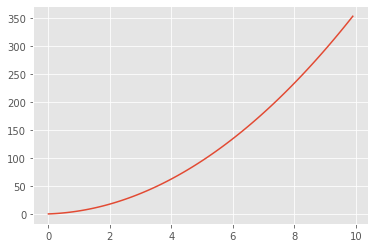

In [ ]:
#los parámetros van a ser

a=3.4
b=2
c=0

#generamos la variable x

x=np.arange(0,10,0.1)

#generamos y cuadrático]

y=(a*x**2+b*x+c)

#miremos los datos
plt.plot(x,y)

Ahora la agregamos un ruido del 10% alrededor los datos

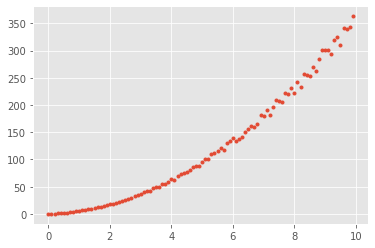

In [ ]:
y=y*(1+(np.random.random(len(y))-0.5)/10)

#veamos cómo quedó
plt.plot(x,y,'.')

Ahora, vamos a aplicar el método de cuadrados mínimos para averiguar el valor del parámetro $a$, suponiendo que $b$ y $c$ son conocidos. Para eso empezamos creando una función que calcula la suma del error cuadrático, que es lo que queremos minimizar en el método de cuadrados mínimos. Escribiendo la variable "modelo" como una cuadrática es donde estamos eligiendo entre una *familia de funciones cuadráticas*. 


In [ ]:
def error_cuadratico(datos,a): #depende de los datos y del valor del parámetro A, que es el que queremos ajustar
    modelo=(a*x**2+b*x+c) #x, b, c son "conocidos", son los definidos anteriormente
    error=sum((modelo-datos)**2) #este es el error que queremos minimizar en cuadrados mínimos

    return error 

Ahora aplicamos el método de cuadrados mínimos, lo que vamosa hacer es empezar con un valor semilla de a y variarlo al azar. Si con esa variación el error se achicó, la tomamos, si no la descartamos. Vamos a repetir esto N veces y analizar hacia dónde converge. Haciendo esto, generamos una implementación iterativa del método de cuadrados mínimos. 

In [ ]:
N=5000 #cantidad de iteraciones
err_cuad=np.zeros(N)
a_valores=np.zeros(N) #aca vamos a registrar los valores de a
a=2 #valor semilla, recuerden que los datos fueron generados con a=3.4

error=error_cuadratico(y,a) #recuerden que llamamos x a los datos ruidosos

for i in range(N):
  a_prueba=a+(np.random.random(1)-0.5)/100
  
  err_prueba=error_cuadratico(y,a_prueba)
  
  if err_prueba<error:
    a=a_prueba
    error=err_prueba
  
  a_valores[i]=a
  err_cuad[i]=error  

Veamos a dónde convergió

In [ ]:
print(a)

[3.40190246]


Veamos cómo evolucionó el valor de $a$ a lo largo de las iteraciones

Text(0, 0.5, 'valor de a')

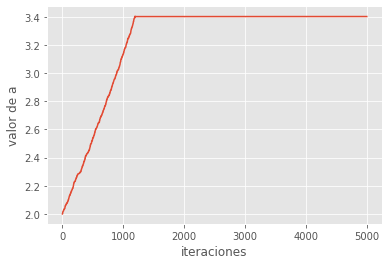

In [ ]:
plt.plot(a_valores)
plt.xlabel('iteraciones')
plt.ylabel('valor de a')

Veamos cómo evolucionó el error cuadrático

Text(0, 0.5, 'error cuadratico')

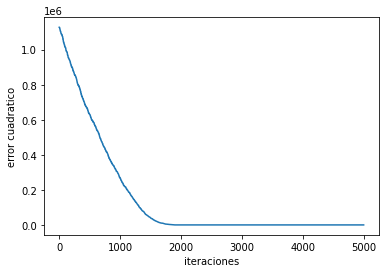

In [ ]:
plt.plot(err_cuad)
plt.xlabel('iteraciones')
plt.ylabel('error cuadratico')

¿Qué te parece la curva del error en función del número de iteraciones? En este caso, su comportamiento es similar al que tenían las funciones de costo de machine learning. ¿tiene sentido que eso sea así? ¿por qué?

Ahora veamos cómo quedó el ajuste

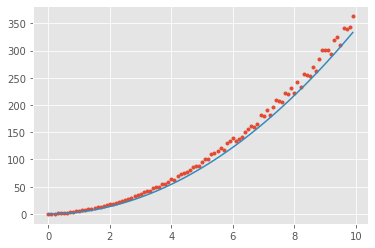

In [ ]:
y_ajuste=a*x**2+b*x*c #acá a es el ajustado
plt.plot(x,y,'.')
plt.plot(x,y_ajuste)


Así es como podría implementarse el método de cuadrados sin usar la librería de python.

**¿Cómo se una en ciencia de datos?**

La mayoría de las empresas utilizan el análisis de regresión para explicar un fenómeno que quieren comprender (por ejemplo, ¿por qué se redujeron las llamadas al servicio de atención al cliente el mes pasado?); predecir cosas sobre el futuro (por ejemplo, ¿cómo serán las ventas en los próximos seis meses?); o para decidir qué hacer (por ejemplo, ¿debemos optar por esta promoción o por otra diferente?).

> **Precaución**: “Una relación (o correlación) no es causalidad”
>
> “Tienes que salir y ver lo que está pasando en el mundo real. ¿Cuál es el mecanismo físico que está causando la relación?


